<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumCircuitwith_Qiskit_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m pip install 'qiskit[visualization]'
!python -m pip install numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 KB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 KB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━

In [ ]:
!python -m pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
bokeh                         2.4.3
branca                        0.6.0
CacheControl                  0.12.11
cached-property               1.5.2
cachetools                    5.3.0
catalogue                     2.0.8
cert

In [ ]:
# Click 'try', then 'run' to see the output,
# you can change the code and run it again.
print("This code works!")
from qiskit import QuantumCircuit
qc = QuantumCircuit(2) # Create circuit with 2 qubits
qc.h(0)    # Do H-gate on q0
qc.cx(0,1) # Do CNOT on q1 controlled by q0
qc.measure_all()
qc.draw()

This code works!


┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1


Total count for 00 and 11 are: {'00': 515, '11': 485}


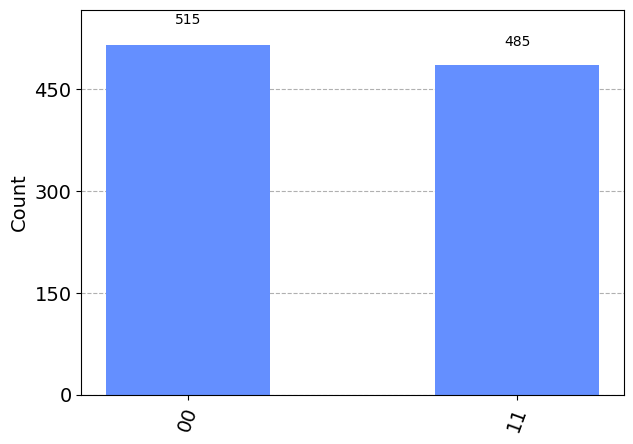

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Use Aer's AerSimulator
simulator = AerSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0, 1], [0, 1])

# Compile the circuit for the support instruction set (basis_gates)
# and topology (coupling_map) of the backend
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the aer simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:", counts)

# Draw the circuit
circuit.draw()

# 히스토그램으로 결과 표시하기
plot_histogram(counts)

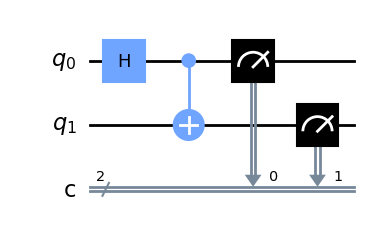

In [ ]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure(range(2), range(2))
qc.draw('mpl')

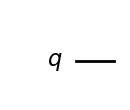

In [ ]:
#Setting a Quantum Circuit
from qiskit import QuantumCircuit

qc = QuantumCircuit(1)
qc.draw('mpl')

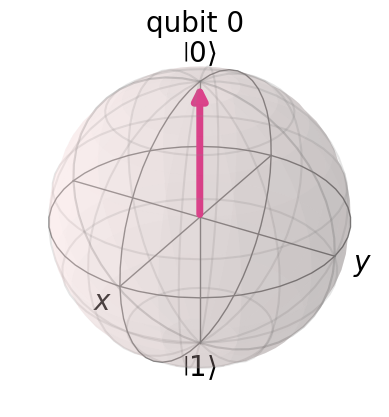

In [ ]:
#양자비트를 표현하는 방법은 크게 2가지임. 하나는 Vector와 Matrix로 표혀하는 방법이고
#다른 하나는 Bloch Sphere 방식입니다. Bloch Sphere는 양자중첩(Superposition)의 상태를 효과적으로 표현할 수 있습니다.
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)
#양자회로에서 초기 상태는 아래 Bloch Sphere에서 표현되는 '0'이 100%인 상태임

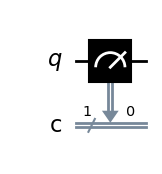

In [ ]:
#하나의 큐비트 측정
#결과: 0 또는 1의 확률가능성
qc = QuantumCircuit(1, 1)
qc.measure([0], [0])
qc.draw('mpl')

In [ ]:
#위를 통해서 보면 0의 값이 나오는 것이 100%라는 것이다.
from qiskit import BasicAer, execute
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024) #1024번을 측정했는데
result = job.result()
result.get_counts()

#큐비트를 1,024번 측정했는데 측정된 결과가 계속 0 이었다는 의미
  

{'0': 1024}

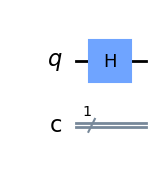

In [ ]:
#Quantum Gates(1) - Hadamard Gate
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.draw('mpl')

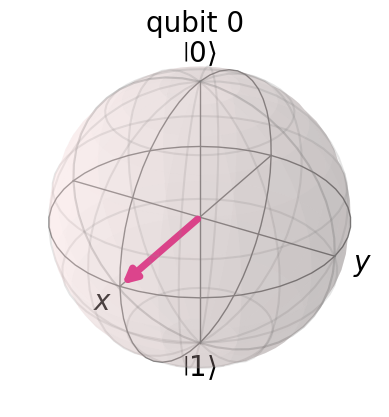

In [ ]:
#Hadamard Gate는 0이 100%인 큐비트는 0과 1이 50% 상태인 중첩상태로 만들어 줌
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

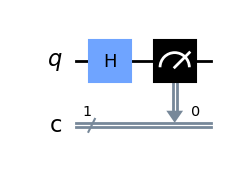

In [ ]:
qc.measure([0], [0])
qc.draw('mpl')

In [ ]:
backend =  BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
result.get_counts()
#0과 1인 관측될 확률이 아래 50:50% 정도로 계속나옴

{'1': 504, '0': 520}

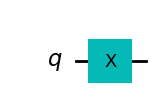

In [ ]:
#Quantum Gates(2) - Pauli Gates
#2.1. Pauli-X gate(NOT)
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

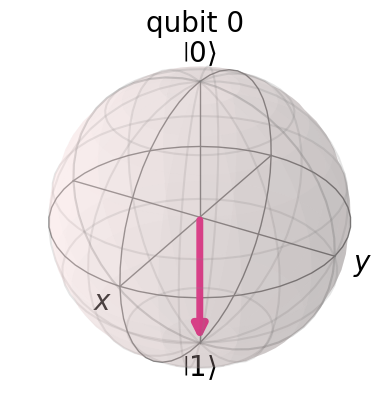

In [ ]:
from qiskit.visualization.state_visualization import plot_bloch_vector
#Pauli-X gate는 Bloch Sphere X게이트를 중심으로 180도 회전하는 효과
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

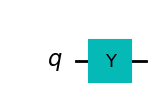

In [ ]:
#2.2. Pauli-Y gate
#Y축을 중심으로 180도 회전하는 역할
qc = QuantumCircuit(1)
qc.y(0)
qc.draw('mpl')


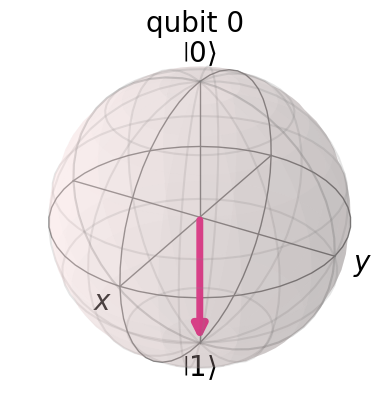

In [ ]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

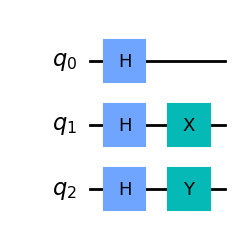

In [ ]:
#Difference between Pauli-X and Pauli-Y gate
qc = QuantumCircuit(3)
qc.h(range(3))
qc.x(1)
qc.y(2)
qc.draw('mpl')

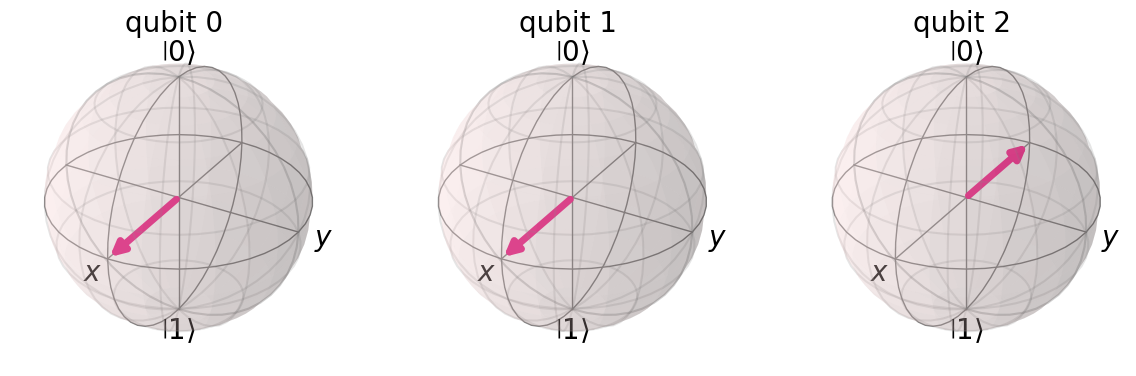

In [ ]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

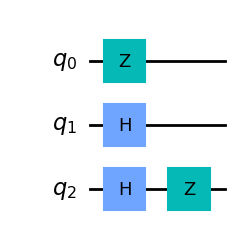

In [ ]:
#2.3. Pauli-Z gate
qc = QuantumCircuit(3)
qc.h([1, 2])
qc.z([0,2])
qc.draw('mpl')

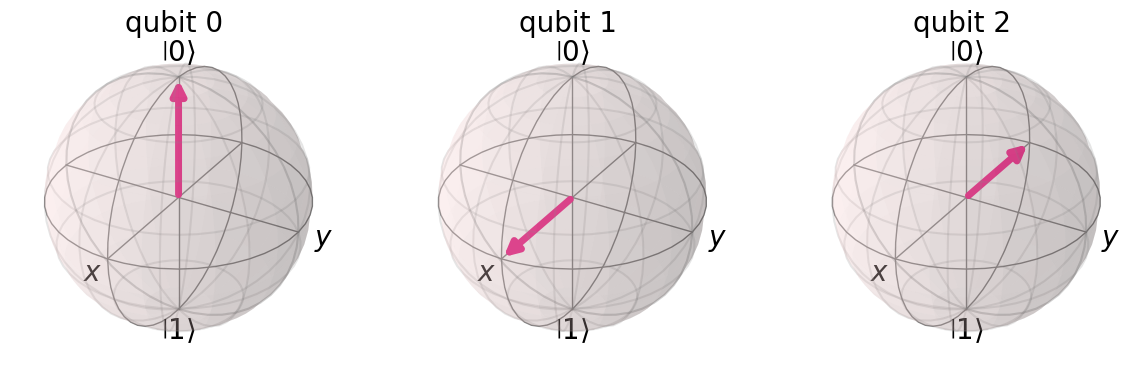

In [ ]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

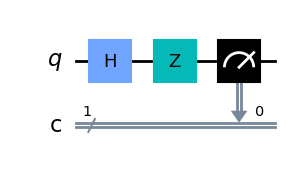

In [ ]:
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.z(0)
qc.measure([0], [0])
qc.draw('mpl')

In [ ]:
qc.measure([0], [0])
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
result.get_counts()

{'0': 503, '1': 521}

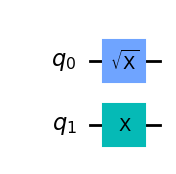

In [47]:
#Quantum Gates(3) - sqare_root(X) Gate
qc = QuantumCircuit(2)
qc.sx(0)
qc.x(1)
qc.draw('mpl')

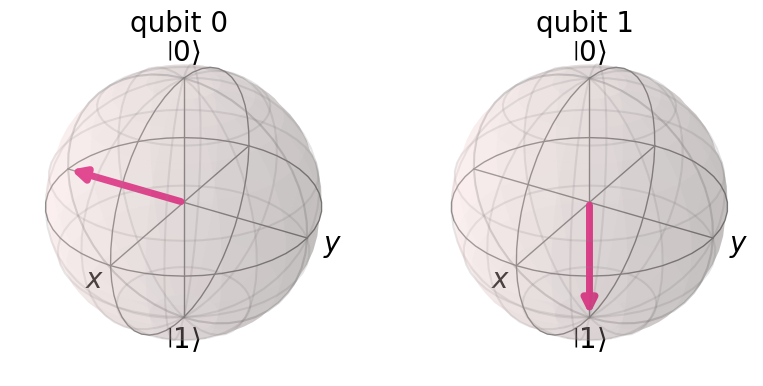

In [48]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

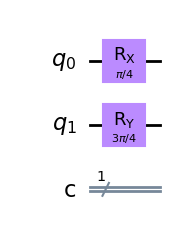

In [50]:
#Quantum Gates (4) - Rotation Gates
import math
qc = QuantumCircuit(2, 1)
qc.rx(math.pi/4, 0) #X축을 중심으로 4분에 1파이 회전
qc.ry(3 * math.pi/4, 1) #Y축을 중심으로 3 * 4분의 1파이 회전
#임의의 각도로는 조정이 불가하고 1/4, 1/2,..정도로 각도변화가 가능하다.
qc.draw('mpl')

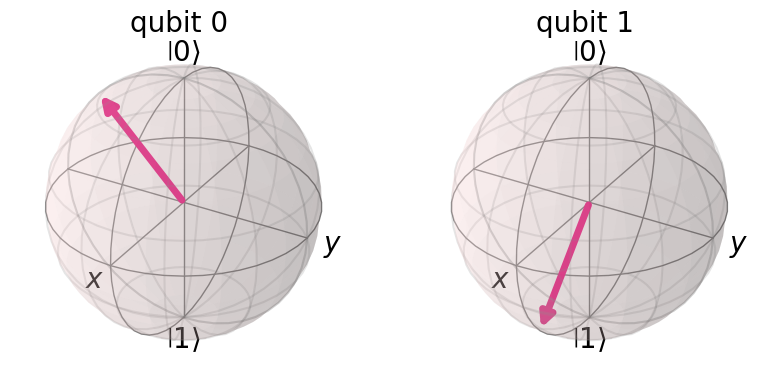

In [51]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

In [52]:
#위의 첫번째 큐비트 상태 측정하면, 위의 그림에는 0에 보다 가깝게 되어있음.
qc.measure([0], [0])
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
result.get_counts()
#0으로 측정될 확률이 1로 측정될 확률보다 크게 나옴

{'0': 884, '1': 140}